# Dependências

In [1]:
#importantndo bibliotecas
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
%matplotlib inline
import cloudpickle

In [2]:
# Constantes
DATA_RAW_PATH = os.path.join('..','data','raw')
DATA_INTER_PATH = os.path.join('..','data','inter') 
DATA_INTER_TRAIN_NAME = 'train_inter.csv'
DATA_INTER_TRAIN_NAME_1 ='train_inter1.csv'
IMG_PATH = os.path.abspath(os.path.join('..','img'))
META_DATA_PATH = os.path.join(DATA_RAW_PATH,'dicionario_tipos.pkl')
META_DATA_INTER = os.path.join(DATA_INTER_PATH,'dicionario_tipos_inter.pkl')

In [3]:
# Dados
with open(META_DATA_PATH,'rb') as f:
    dicionario_tipo = cloudpickle.load(f)
df_train = pd.read_csv(os.path.join(DATA_INTER_PATH, DATA_INTER_TRAIN_NAME), dtype=dicionario_tipo)

# Tópicos da Exploração

In [4]:
df_train.head()

,Department,Role,Will_Relocate,Trending Perf,Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,salary,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest),left_Company
0,Finance,Level 2-4,0,3,6,0.4,3.0,1.0,2.0,1.0,3,5,4,4,5,5,5,4,4,3,0.64,5,234,2,1,0,medium,44,5,3,1,3,1,1,1,2,1,5,1,5,3,4,1,2,2,2,2548,78,9,0
1,Warehouse,Level 2-4,0,3,6,0.8,3.0,3.0,4.0,4.0,3,5,4,4,5,1,2,3,2,1,0.82,5,265,5,0,0,medium,3,1,4,4,2,2,2,2,1,1,3,1,5,5,5,1,1,5,2,1514,85,7,1
2,Finance,Level 1,1,3,6,0.8,3.0,3.0,4.0,4.0,3,5,4,4,5,5,5,4,4,3,0.80,3,137,5,0,0,low,8,1,5,5,3,2,4,3,2,4,2,3,2,1,5,1,5,2,3,4980,70,7,0
3,Sales,Level 1,0,3,6,0.8,3.0,3.0,4.0,4.0,3,5,4,4,5,5,5,4,4,3,0.79,5,222,2,0,0,low,2,3,3,5,5,3,3,3,2,3,2,2,2,3,3,2,3,5,1,5953,78,9,0
4,Operations,Director,0,3,6,0.8,3.0,3.0,4.0,4.0,3,5,4,4,5,5,5,4,4,3,0.72,5,232,4,0,0,low,3,5,1,1,1,2,3,3,3,4,5,2,1,2,4,2,3,3,3,5447,80,4,0


In [5]:
#Checando a média de baseada no target(left_Company) Demissão.
abandono=df_train.groupby('left_Company')
abandono.mean()

,Will_Relocate,Trending Perf,Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
left_Company,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.503391,3.0,6.0,0.618267,2.984249,2.644279,3.639029,3.777182,2.858893,4.450886,3.450886,3.792168,4.109604,5.0,5.0,4.0,4.0,3.0,0.715258,3.784620,199.161781,3.393349,18.632794,3.002735,3.013017,3.002406,2.999781,2.337344,2.310654,2.156858,2.148436,2.347736,2.97856,2.329140,3.013564,2.998359,2.967841,1.679064,2.986655,3.008860,3.018377,3733.164406,77.725443,6.372129
1,0.493175,3.0,6.0,0.614526,2.939097,2.909695,3.889394,4.326916,2.779489,4.099755,3.099755,3.664683,3.534827,1.0,2.0,3.0,2.0,1.0,0.718439,3.860343,207.613931,3.871194,18.221561,2.985999,3.021001,3.020651,3.001750,1.512076,1.487224,1.497725,1.502625,1.560028,2.99370,1.542877,2.974799,2.952748,3.013651,1.681134,3.056003,2.976549,3.029751,2339.533427,78.956248,6.362618


## Características Marcantes 

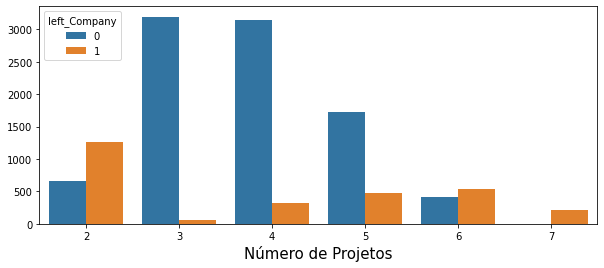

In [6]:
#Verificando a relação entre no número de projetos e saida da empresa.

plt.figure(figsize=(10,4))
fig = sns.countplot(x='number_project',data=df_train,hue='left_Company')
plt.xlabel('Número de Projetos',size=15)
plt.ylabel('')
plt.savefig(os.path.join(IMG_PATH,'relação_saida&quantidade_de_projetos.png'), format='png')
plt.show()

Pode-se notar que há um grupo de risco entre pessoas que possuem 2 projetos e  6 / 7 projetos, subentende-se que pessoas com muitos projetos e com poucos pedem demissão. Considerando uma faixa segura de 3 a 5 projetos por pessoa. 

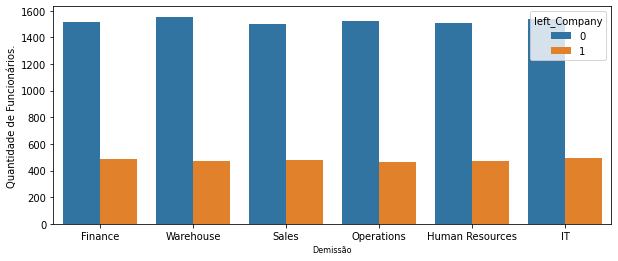

In [7]:
#Departamento vs demissão

plt.figure(figsize=(10,4))
sns.countplot(x='Department',data=df_train,hue='left_Company')
plt.xlabel('Demissão',size=8)
plt.ylabel('Quantidade de Funcionários.')
plt.savefig(os.path.join(IMG_PATH,'DepartamentovsDemissão.png'), format='png')
plt.show()

Aparentemente não há relação entre a profissão e demissão.

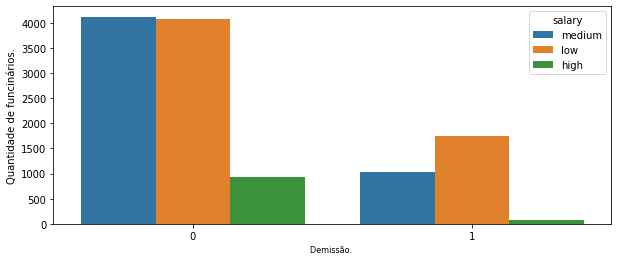

In [8]:
#Relação entre Salário e Demissão. 
plt.figure(figsize=(10,4))
sns.countplot(x='left_Company',data=df_train,hue='salary')
plt.xlabel('Demissão. ',size=8)
plt.ylabel('Quantidade de funcinários.')
plt.savefig(os.path.join(IMG_PATH,'Relação entre salario e pedido de demissão.png'), format='png')
plt.show()

Geralmente quem possui salário baixo pede demisssão. 

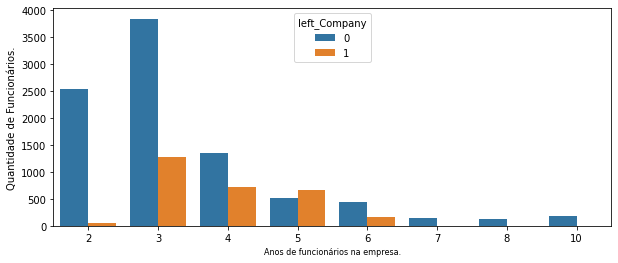

In [9]:
# Relação entre tempo na empresa e demissão.
plt.figure(figsize=(10,4))
sns.countplot(x='time_spend_company',data=df_train,hue='left_Company')
plt.xlabel('Anos de funcionários na empresa.',size=8)
plt.ylabel('Quantidade de Funcionários.')
plt.savefig(os.path.join(IMG_PATH,'tempo_de_funcionario_demissão.png'), format='png')
plt.show()

Grande parte dos funcionários passam no máximo 5 anos na empresa, sua saída pode ser justificada pela falta de promoção na empresa.

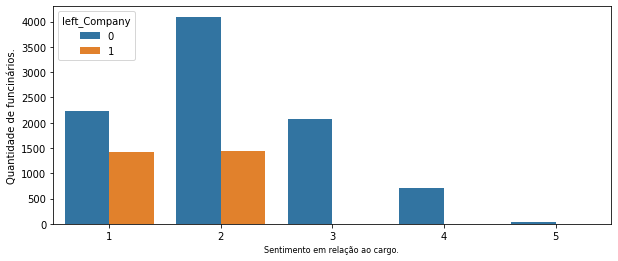

In [10]:
# Relação entre Sentimento em relação ao cargo e demissão.
plt.figure(figsize=(10,4))
sns.countplot(x='Emp_Title',data=df_train,hue='left_Company')
plt.xlabel('Sentimento em relação ao cargo. ',size=8)
plt.ylabel('Quantidade de funcinários.')
plt.savefig(os.path.join(IMG_PATH,'quantidade_funcionarios_relacao_com_cargo.png'), format='png')
plt.show()

Funionários que atribuem notas entre 1 e 2 não se sentem bem relação ao seu cargo e geralmente pedem demissão.

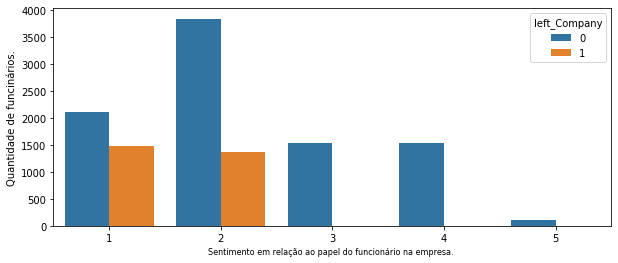

In [11]:
#Gráfico do papel do funcionário na empresa
plt.figure(figsize=(10,4))
sns.countplot(x='Emp_Role',data=df_train,hue='left_Company')
plt.xlabel('Sentimento em relação ao papel do funcionário na empresa. ',size=8)
plt.ylabel('Quantidade de funcinários.')
plt.savefig(os.path.join(IMG_PATH,'sentimento_papel_do_funcionario_na_empresa.png'), format='png')
plt.show()

Funionários que atribuem notas entre 1 e 2 ou seja, o funcionário não está sentindo que tem um papel importante na empresa, geralmente estes pedem demissão.

In [12]:
#Média geral de satisfação da feature EMP_Sat_OnPrem
cols_Sat_OnPrem = df_train.filter(regex='EMP_Sat_OnPrem').columns.tolist()
df_train['EMP_Sat_OnPrem_mean'] = round(df_train[cols_Sat_OnPrem].mean(axis=1),1)
# dropando as features 
df_train.drop(cols_Sat_OnPrem, axis=1,inplace=True)

In [13]:
#Média geral de satisfação da feature EMP_Sat_Remote
cols_Sat_Remote = df_train.filter(regex='EMP_Sat_Remote').columns.tolist()
df_train['EMP_Sat_Remote_mean']=round(df_train[cols_Sat_Remote].mean(axis=1),1)
#dropando as features
df_train.drop(cols_Sat_Remote, axis=1,inplace=True)

In [14]:
#Média geral de satisfação da feature EMP_Engagement_
cols_EMP_Engagement = df_train.filter(regex='EMP_Engagement').columns.tolist()
df_train['EMP_Engagement_mean'] = round(df_train[cols_EMP_Engagement].mean(axis=1),1)
# dropando as features
df_train.drop(cols_EMP_Engagement, axis=1,inplace=True)

In [15]:
# Média do status esforço do funcionário.

cols_Emp_Work_Status = df_train.filter(regex='Emp_Work_Status').columns.tolist()
df_train['Emp_Work_Status_mean'] = round(df_train[cols_Emp_Work_Status].mean(axis=1),1)
# dropando as features
df_train.drop(cols_Emp_Work_Status, axis=1,inplace=True)

In [16]:
# Média de como o funcionário de sente
cols_Emp_Competitive = df_train.filter(regex='Emp_Competitive').columns.tolist()
df_train['Emp_Competitive_mean'] = round(df_train[cols_Emp_Competitive].mean(axis=1),1)
# dropando as features
df_train.drop(cols_Emp_Competitive, axis=1,inplace=True)

In [17]:
# Média de colaboração do funcionário
cols_Emp_Collaborative = df_train.filter(regex='Emp_Collaborative').columns.tolist()
df_train['Emp_Collaborative_mean'] = round(df_train[cols_Emp_Collaborative].mean(axis=1),1)
# dropando as features
df_train.drop(cols_Emp_Collaborative, axis=1,inplace=True)

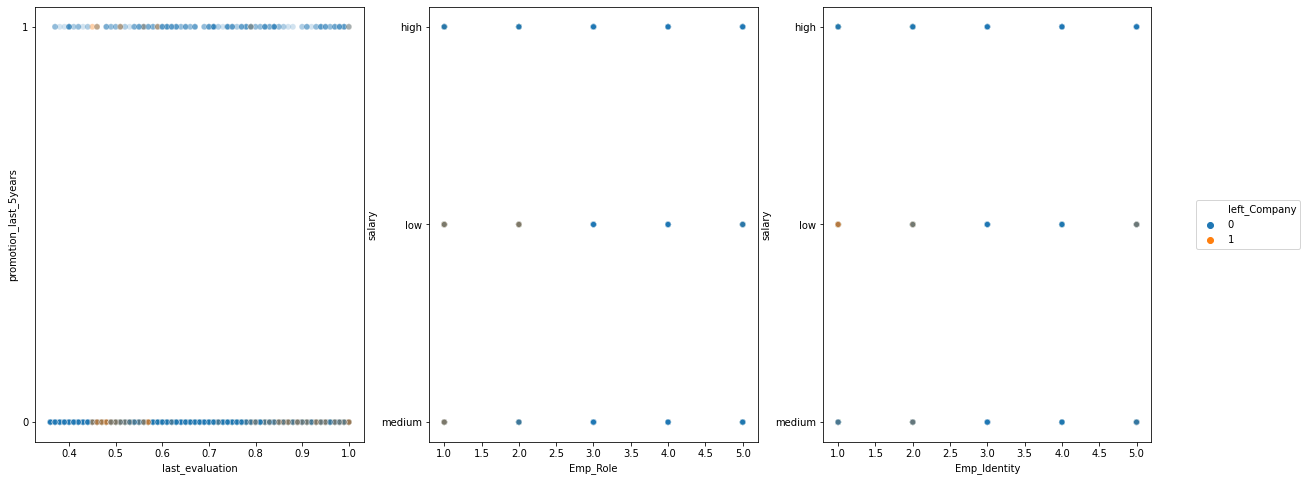

In [18]:

#Cria o grid
fig, ax = plt.subplots (1, 3, figsize = (20,8))


sns.scatterplot(x='last_evaluation', y='promotion_last_5years', hue='left_Company', data=df_train, alpha=0.2, ax=ax[0],legend= False)

sns.scatterplot(x='Emp_Role', y='salary', hue='left_Company', data=df_train, alpha=0.2, ax=ax[1],legend= False)

sns.scatterplot(x='Emp_Identity', y='salary',hue='left_Company', data=df_train, alpha=0.2,ax = ax[2])

plt.legend(loc='center left', bbox_to_anchor=(1.12, 0.5), ncol=1)

plt.show ()

Com base no gráfico de dispersão, pessoas que foram promovidas nos ultimos 5 anos ainda sim pedem demissão,  pessoas com salário médio ou alto, mas que sentem que não possuem um papel importante na empresa também pedem demissão, e o mesmo ocorre com pessoas que não se indentificam com a empresa. Além disso, vale destacar que existe uma massa de pessoas com excelente avaliação e que não foram promovidas, o que pode ser uma das justificativas de sua saída. Por fim, também há aqueles que foram promovidos, mas que possuem baixa avaliação. A promoção, nesse caso, pode ter sido equivocada, provocando a saída do funcionário.

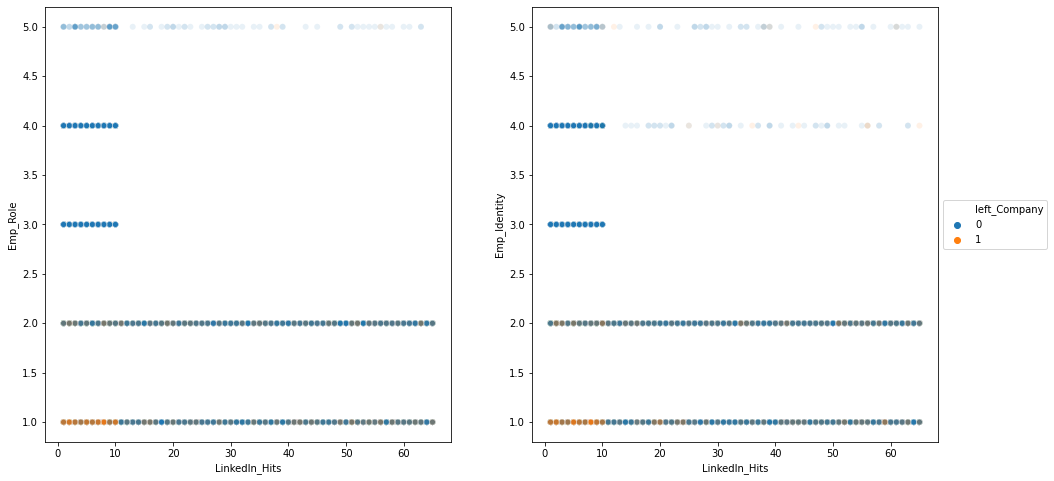

In [19]:
#Cria o grid
fig, ax = plt.subplots (1, 2, figsize = (16,8))


#Contador para o índice de feature
sns.scatterplot(x='LinkedIn_Hits', y='Emp_Role', hue='left_Company', data=df_train, alpha=0.1, ax=ax[0],legend= False)

sns.scatterplot(x='LinkedIn_Hits', y='Emp_Identity', hue='left_Company', data=df_train, alpha=0.1, ax=ax[1])


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)

plt.show ()

Nesse caso, fica claro que a maior parte que pede demissão não se identifica com a empresa e não acreditam que o papel que ocupam seja importante. O fato de uma parte desse público não procurar outras empresas no LinkedIn pode revelar que recrutadores das empresas estejam procurando-os e, pelos motivos citados, acabam saindo.

In [20]:
#Distribuições das váriaveis numéricas. 
todas_as_variaveis = set(df_train.columns.tolist())
variaveis_categoricas = set(df_train.select_dtypes(include=['object']).columns.tolist())
variaveis_numericas = todas_as_variaveis - variaveis_categoricas

In [21]:
variaveis_numericas.add('left_Company')

<ipython-input-22-c87e189b16f1>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(5,5))


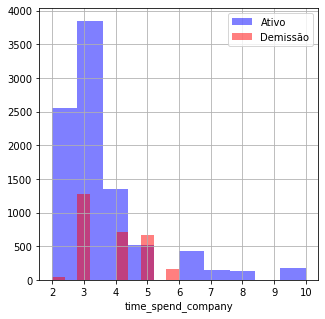

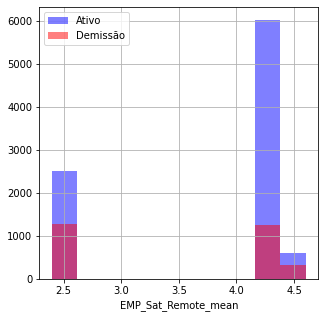

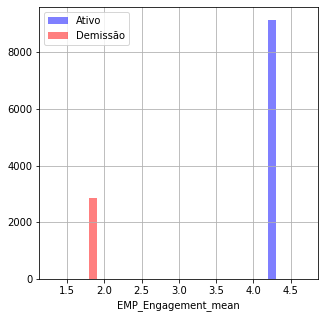

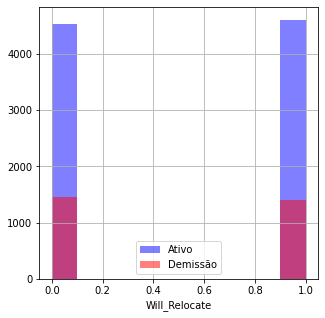

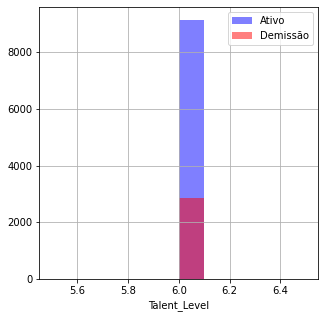

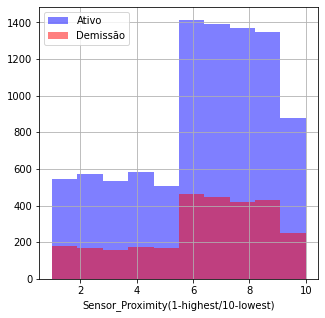

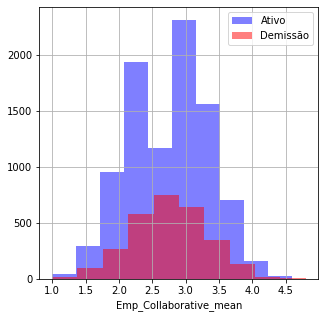

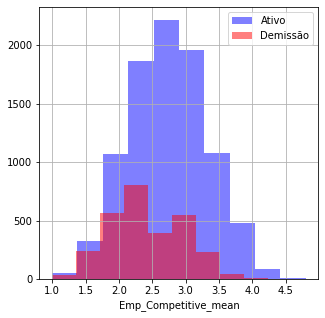

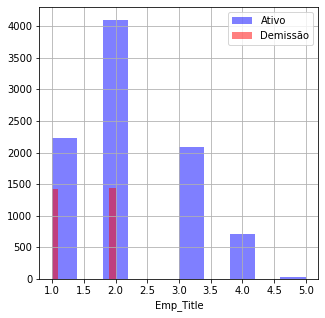

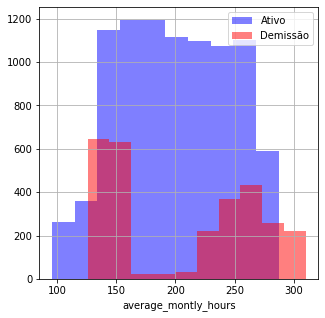

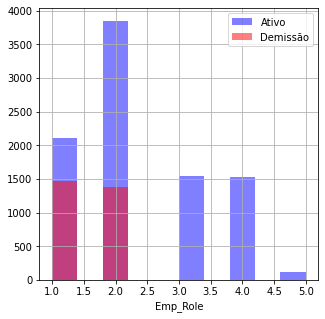

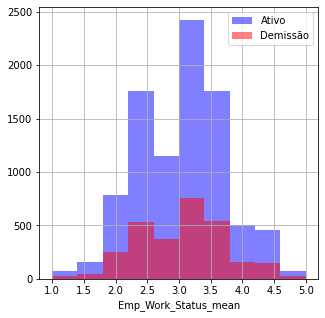

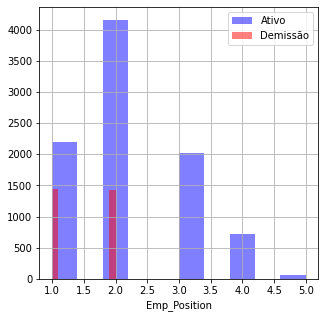

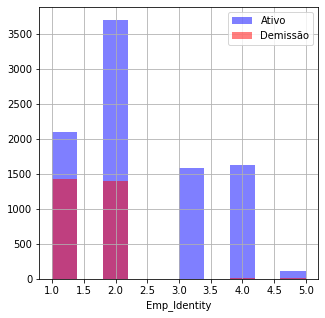

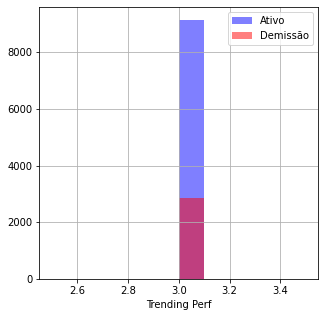

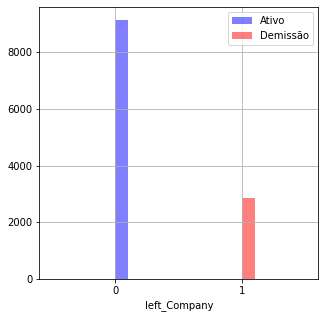

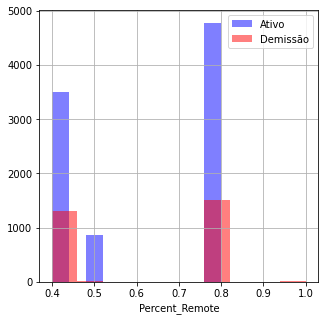

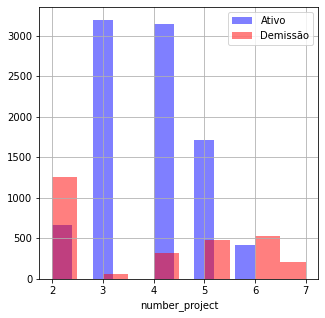

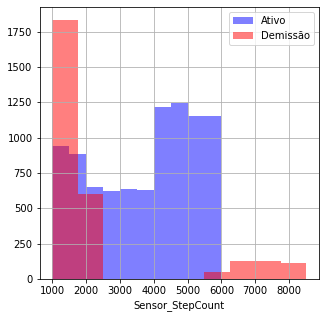

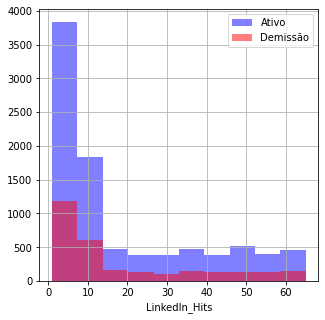

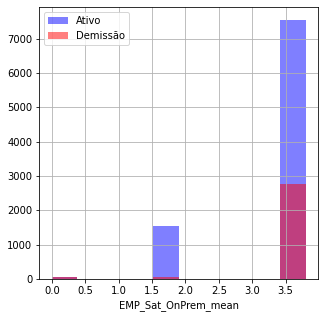

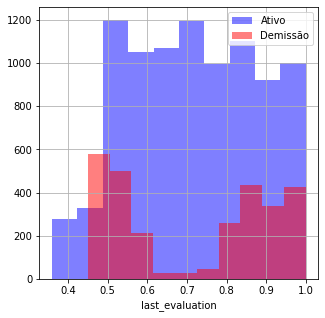

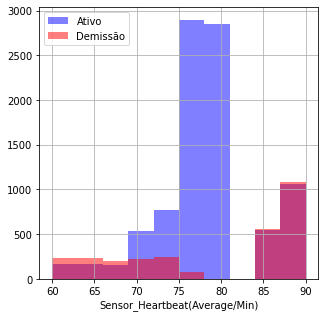

In [22]:
#num_feat_cat = cat_num + num_feat
for col_num in variaveis_numericas:
    plt.figure(figsize=(5,5))
    df_train[df_train['left_Company']=='0'][col_num].hist(alpha = 0.5, color ='blue', label = 'Ativo')
    df_train[df_train['left_Company']=='1'][col_num].hist(alpha = 0.5, color = 'red', label = 'Demissão')
    plt.legend()
    plt.xlabel(col_num)

In [23]:
# Deletando colunas (chaves-valor) excluidos do dicionário
cols_to_drop_dict = cols_Sat_OnPrem+cols_Sat_Remote+cols_EMP_Engagement+cols_Emp_Work_Status+cols_Emp_Collaborative
for column in cols_to_drop_dict:
    del dicionario_tipo[column] 

In [24]:
# Salvando o novo dicionario como pickle
with open(META_DATA_INTER, 'wb') as f:
    cloudpickle.dump(dicionario_tipo, f)

In [25]:
# Salvando o novo dataframe de treino (sem as colunas agrupadas)
df_train.to_csv(os.path.join(DATA_INTER_PATH,DATA_INTER_TRAIN_NAME_1), index=False)

# Conclusões 



* EMP_Engagement_mean ( Engajamento das pessoas ) Essa média de avaliação discrimina bem entre quem se demitiu ou não. Aqueles que atribuem pontuação <=2 geralmente pedem demissão.  


* last_evaluation (A pontuação na última avaliação do funcionário) pessoas que receberam pontuação ente 0.3 e 0.5, pedem demissão.


* number_project(número de projetos) Pode-se notar que há um grupo de risco entre pessoas que possuem 2 projetos e  6 / 7 projetos, subentende-se que pessoas com muitos projetos e com poucos pedem demissão. Considerando uma faixa segura de 3 a 5 projetos por pessoa.


* promotion_last_5years (O funcionário foi promovido nos últimos 5 anos) Cerca de 24% dos funcionários que não recebem promoção saem da empresa, já cera de 0.6% saem após da promoção.


* Sensor_StepCount(Dispositivos sensíveis são usados pra capturar determinadas atividades dos funcionários), <= 2500 e >=6000, estes geralmentes pedem demissão.


* Emp_positon (Como o funcionário se identifica com a importância de sua posição na empresa). Pessoas que atribuem nota inferior as 2 são as que pedem demissão, geralmente. 


* Sensor_Heartbeat(average/min)(batimento cardiaco por mim). Pessoas que apresentam mais de 83 batimentos cardiacos por minutos geralmente pedem demissão. E uma pequena quantidade de pessoas com a média de 60~70 também. 

 
* time_spend (anos de serviço) Geralmente as pessoas trabalham apenas 5 anos nessa empresa. (talvez por falta de promoção elas costumam a sair). 


* Work_accident (Acidentes na empresa) Nota-se que geralemente quem sofreu algum tipo de acidente na empresa não pediu demissão.


* Emp_Title (Como o funcionário se sente em relação ao seu cargo). Há uma média de baixa de funcionários satisfeito com o seu cargo, e geralmente estes pedem demissão


* Emp_Role (Como o funcionário se identifica com a importância de seu papel na empresa). Funionários que atribuem notas entre 1 e 2 ou seja, o funcionário não está sentindo que tem um papel importante na empresa, geralmente estes pedem demissão.
 